# Intro to Scikit-Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


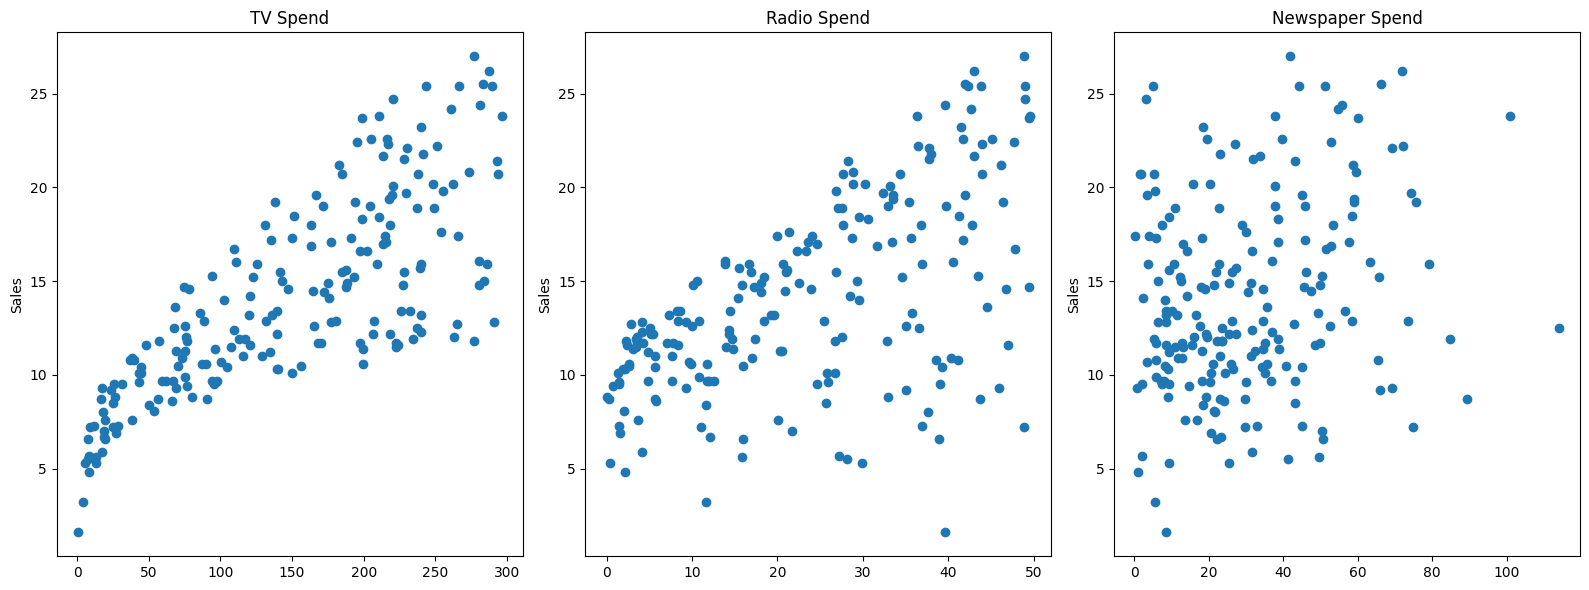

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [5]:
X = df.drop('sales', axis=1)

In [6]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

# Errors

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
df['sales'].mean()

14.0225

In [18]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [20]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [21]:
test_residuals = y_test - test_predictions

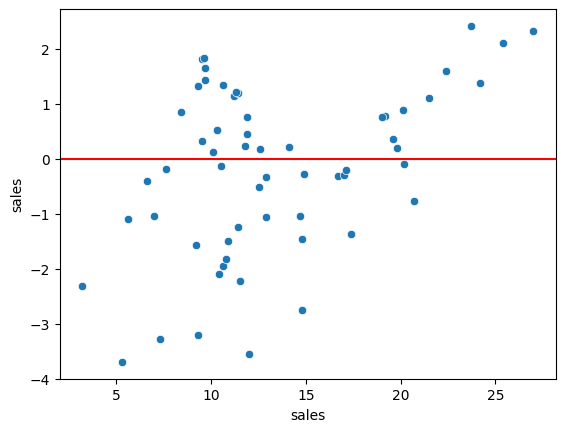

In [24]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color = 'red')

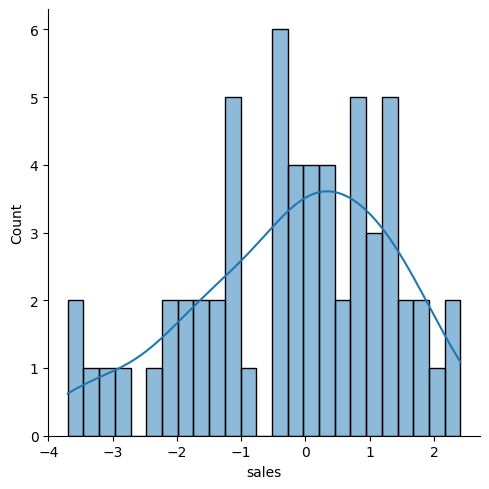

In [25]:
sns.displot(test_residuals, bins = 25, kde=True)

In [26]:
import scipy as sp

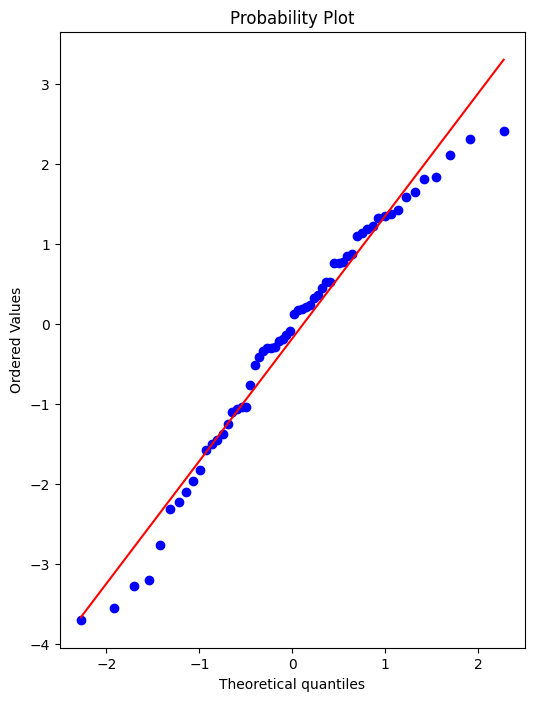

In [28]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [29]:
final_model = LinearRegression()

In [30]:
final_model.fit(X, y)

LinearRegression()

In [31]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [32]:
y_hat = final_model.predict(X)

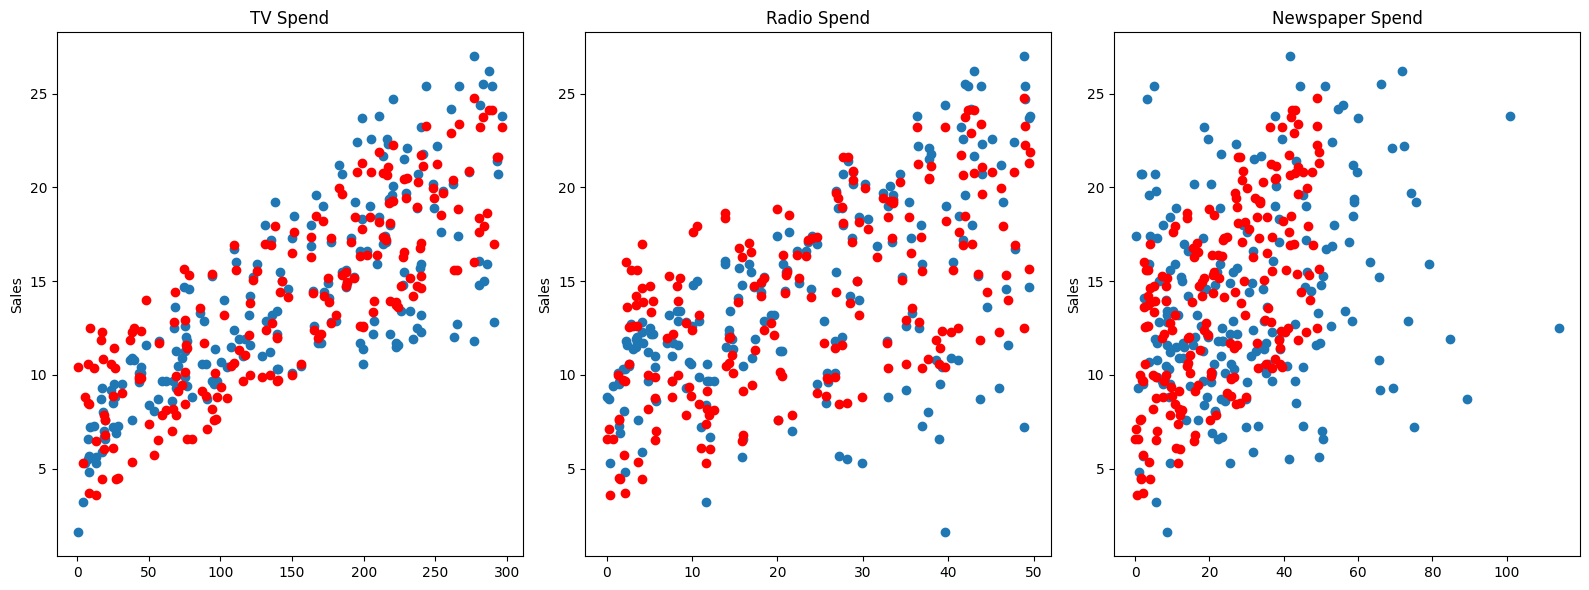

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [34]:
from joblib import dump, load

In [35]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [38]:
campaign = [[149,22,12]]

In [36]:
loaded_model = load('sales_model.joblib')

In [39]:
loaded_model.predict(campaign)

c:\Users\Jayden\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])